In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("../../../data/superstore.csv",encoding="latin-1", parse_dates=["Order Date", "Ship Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [12]:
df = df.dropna()
df = df.drop_duplicates()

In [13]:
# ver de los segment cual es el mas fiel, quien aprovecha mas los descuentos
df_segmento = df.groupby("Segment")["Discount"].mean().reset_index()
print(df_segmento)

       Segment  Discount
0     Consumer  0.158141
1    Corporate  0.158228
2  Home Office  0.147128


In [14]:
# cuanta cantidad gasta un cliente por venta por segmento
df_segmento_gasto = df.groupby("Segment")["Sales"].mean().reset_index()
print(df_segmento_gasto)

       Segment       Sales
0     Consumer  223.733644
1    Corporate  233.823300
2  Home Office  240.972041


In [15]:
# volumen q gasta un cliente por venta por segmento
df_segmento_gasto = df.groupby("Segment")["Sales"].size().reset_index()
print(df_segmento_gasto)

       Segment  Sales
0     Consumer   5191
1    Corporate   3020
2  Home Office   1783


In [16]:
# analizar dias entre orden y envio
df["Dias_Envio"] = (df["Ship Date"] - df["Order Date"]).dt.days
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Dias_Envio
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896,3.958175
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,3.000000
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,4.000000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,5.000000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,7.000000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,1.747567


In [17]:
# Sacamos Suma y Promedio al mismo tiempo para comparar
df_sub_completo = df.groupby(["Category", "Sub-Category"]).agg({
    'Profit': ['sum', 'mean'],
    'Discount': 'mean',
    'Sales': 'sum'
}).reset_index()

# Renombrar las columnas 
df_sub_completo.columns = ['Category', 'Sub-Category', 'Total_Profit', 'Avg_Profit', 'Avg_Discount', 'Total_Sales']

# Ordenamos por los que mas plata TOTAL hicieron perder
df_sub_completo = df_sub_completo.sort_values(by='Total_Profit', ascending=True)
df_sub_completo.head(10)

,Category,Sub-Category,Total_Profit,Avg_Profit,Avg_Discount,Total_Sales
3,Furniture,Tables,-17725.4811,-55.565771,0.261285,206965.5320
0,Furniture,Bookcases,-3472.5560,-15.230509,0.211140,114879.9963
12,Office Supplies,Supplies,-1189.0995,-6.258418,0.076842,46673.5380
8,Office Supplies,Fasteners,949.5182,4.375660,0.082028,3024.2800
15,Technology,Machines,3384.7569,29.432669,0.306087,189238.6310
9,Office Supplies,Labels,5546.2540,15.236962,0.068681,12486.3120
5,Office Supplies,Art,6527.7870,8.200737,0.074874,27118.7920
7,Office Supplies,Envelopes,6964.1767,27.418019,0.080315,16476.4020
2,Furniture,Furnishings,13059.1436,13.645918,0.138349,91705.1640
4,Office Supplies,Appliances,18138.0054,38.922758,0.166524,107532.1610


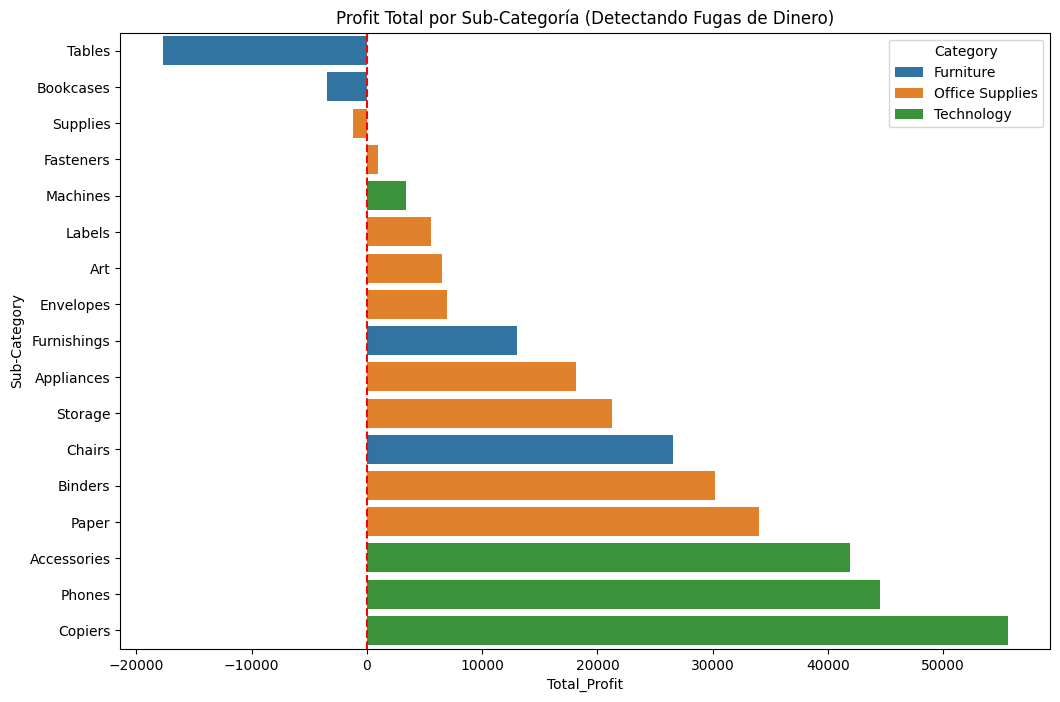

In [18]:
plt.figure(figsize=(12, 8))
# Gráfico de barras horizontales para que se lean bien los nombres
sns.barplot(data=df_sub_completo, x='Total_Profit', y='Sub-Category', hue='Category', dodge=False)

plt.axvline(0, color='red', linestyle='--') # Línea que separa ganancia de pérdida
plt.title('Profit Total por Sub-Categoría (Detectando Fugas de Dinero)')
plt.show()

In [19]:
df["Margin %"] = (df["Profit"] / df["Sales"]) * 100
df.groupby("Segment")["Margin %"].mean()

Segment
Consumer       11.204952
Corporate      12.120261
Home Office    14.286959
Name: Margin %, dtype: float64